In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd
# !git clone --quiet https://github.com/tensorflow/models.git

!apt-get install -qq protobuf-compiler python-tk

!pip install -q Cython contextlib2 pillow lxml matplotlib PyDrive

!pip install -q pycocotools


import warnings
warnings.filterwarnings('ignore')
import os, sys
os.environ['PYTHONPATH'] = '/env/python:/content/drive/My Drive/Colab Notebooks/models/research/slim:/content/drive/My Drive/Colab Notebooks/models/research/object_detection:/content/drive/My Drive/Colab Notebooks/models/research/:/content/drive/My Drive/Colab Notebooks/models/research/object_detection/utils'
sys.path.append('/content/drive/My Drive/Colab Notebooks/models/research/slim/')
sys.path.append('/content/drive/My Drive/Colab Notebooks/models/research/object_detection/utils/')
sys.path.append('/content/drive/My Drive/Colab Notebooks/models/research/object_detection/')
sys.path.append('/content/drive/My Drive/Colab Notebooks/models/research/')
sys.path

/root


In [0]:
%cd '/content/drive/My Drive/Colab Notebooks/models/research/'
# !protoc object_detection/protos/*.proto --python_out=.
# !python object_detection/builders/model_builder_test.py

/content/drive/My Drive/Colab Notebooks/objdet/models/research

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

............s...
----------------------------------------------------------------------
Ran 16 tests in 0.071s

OK (skipped=1)


In [0]:
path = "/content/drive/My Drive/Colab Notebooks/objdet/"
%cd "/content/drive/My Drive/Colab Notebooks/objdet/"
%ls

In [0]:
# !python3 tfr.py --csv_input=train.csv --output_path=train1.record --image_dir=./images/train

In [0]:
# !python3 tfr.py --csv_input=test.csv --output_path=test.record --image_dir=./images/test

Successfully created the TFRecords: /content/drive/My Drive/Colab Notebooks/objdet/test.record


In [0]:
# import os
# import shutil
# import glob
# import urllib
# import tarfile

# MODEL = 'faster_rcnn_inception_v2_coco_2018_01_28'
# MODEL_FILE = MODEL + '.tar.gz'
# DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
# DEST_DIR = 'pretrained_model'

# if not (os.path.exists(MODEL_FILE)):
#   opener = urllib.request.URLopener()
#   opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

# tar = tarfile.open(MODEL_FILE)
# tar.extractall()
# tar.close()

# # os.remove(MODEL_FILE)
# # if (os.path.exists(DEST_DIR)):
# #   shutil.rmtree(DEST_DIR)
# # os.rename(MODEL, DEST_DIR)

In [0]:
%ls

In [0]:
config_path='/content/drive/My Drive/Colab Notebooks/objdet/faster_rcnn_inception_v2_coco.config'
%pwd
%ls

800_550_test.csv                                 result/
800_550_train.csv                                test.jpeg
faster_rcnn_inception_v2_coco_2018_01_28/        test.record
faster_rcnn_inception_v2_coco_2018_01_28.tar.gz  tfrecords.py
faster_rcnn_inception_v2_coco.config             tfr.py
FullIJCNN2013/                                   train/
images/                                          train.py
label_map.pbtxt                                  train.record
models/                                          Untitled0.ipynb


In [0]:
# !python3 train.py \
#         --logtostderr \
#         --train_dir=train \
#         --pipeline_config_path=faster_rcnn_inception_v2_coco.config

In [0]:
# !python3 export_inference_graph.py \
#     --input_type=image_tensor \
#     --pipeline_config_path=faster_rcnn_inception_v2_coco.config \
#     --output_directory=final_model \
#     --trained_checkpoint_prefix=train/model.ckpt-19641

**RUN INFERENCE**

In [0]:
print(os.environ['PYTHONPATH'].replace(':','\n'))

/env/python
/content/drive/My Drive/Colab Notebooks/objdet/models/research/slim
/content/drive/My Drive/Colab Notebooks/objdet/models/research/object_detection
/content/drive/My Drive/Colab Notebooks/objdet/models/research/
/content/drive/My Drive/Colab Notebooks/objdet/models/research/object_detection/utils


In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

# What model to download.
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = 'final_model/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'label_map.pbtxt'

NUM_CLASSES = 1

detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [0]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)




def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)




# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = './images/test'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, img_name) for img_name in os.listdir(PATH_TO_TEST_IMAGES_DIR)[:20]]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)




def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict




for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)
  

Output hidden; open in https://colab.research.google.com to view.

CPU times: user 3.03 s, sys: 185 ms, total: 3.22 s
Wall time: 3.87 s


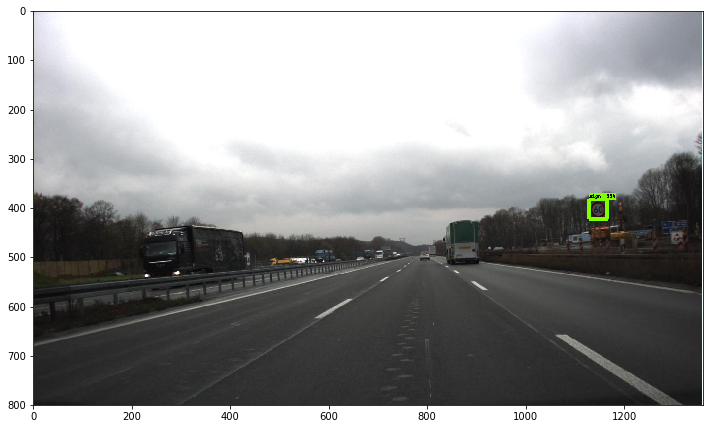

In [0]:
%%time
PATH_TO_TEST_IMAGES_DIR='./images/train'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, img_name) for img_name in os.listdir(PATH_TO_TEST_IMAGES_DIR)]
image = Image.open(TEST_IMAGE_PATHS[444])
# the array based representation of the image will be used later in order to prepare the
# result image with boxes and labels on it.
image_np = load_image_into_numpy_array(image)
# Expand dimensions since the model expects images to have shape: [1, None, None, 3]
image_np_expanded = np.expand_dims(image_np, axis=0)
# Actual detection.
output_dict = run_inference_for_single_image(image_np, detection_graph)
# Visualization of the results of a detection.
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks'),
    use_normalized_coordinates=True,
    line_thickness=8)
plt.figure(figsize=IMAGE_SIZE)
plt.imshow(image_np)